In [ ]:
import pandas as pd

loading data

In [ ]:
sales = pd.read_csv('/content/drive/My Drive/Colab Notebooks/time_series_data/summer-products-with-rating-and-performance_2020-08.csv')

In [ ]:
sales.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [ ]:
sales.tail()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.0,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.0,56,EUR,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",lightblue,S,2,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.0,19,EUR,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",white,SIZE S,15,Livraison standard,2,0,11,50,NaN,NaN,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.0,11,EUR,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",white,Size S.,36,Livraison standard,3,0,29,50,NaN,NaN,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08
1572,Pantalon de yoga pour femmes à la mode Slim Fi...,Fashion Women Yoga Pants Slim Fit Fitness Runn...,7.0,6,EUR,100,1,4.07,14,8.0,3.0,1.0,0.0,2.0,0,0,0,0,"Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...",red,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,AISHOPPINGMALL,aishoppingmall,"90 % avis positifs (7,023 notes)",7023,4.235939,5a409cf87b584e7951b2e25f,0,NaN,https://www.wish.com/c/5e857321f53c3d2d8f25e7ed,https://contestimg.wish.com/api/webimage/5e857...,5e857321f53c3d2d8f25e7ed,summer,2020-08


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sales.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

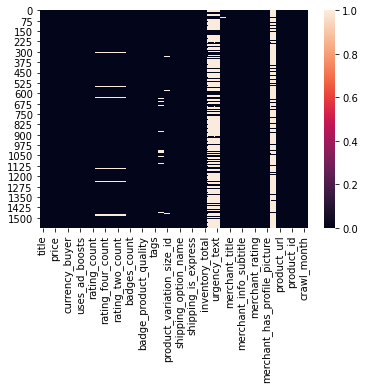

In [ ]:
sns.heatmap(sales.isnull())

##handling null values

drooppin the columns which have more than 50% of NaN values

In [ ]:
sales = sales.drop(['merchant_profile_picture','merchant_info_subtitle','merchant_name','merchant_title','product_url','product_picture','urgency_text','has_urgency_banner','currency_buyer','title'],axis=1)

now I will write a function to separate categorical and numeriacal variables

In [ ]:
def collect_cat (data):
  list_cat = []
  list_num = []
  for x in data.columns:
    if data[x].dtype == 'O':
      list_cat.append(x)
    else:
      list_num.append(x)
  return list_cat,list_num

In [ ]:
list_cat,list_num = collect_cat(sales)

In [ ]:
def handle_null(data,list_cat,list_num):
  for list_cat in list_cat:
    data[list_cat] = data[list_cat].fillna(str(data[list_cat].mode()[0]))
  for list_num in list_num:
    data[list_num] = data[list_num].fillna((data[list_num]).mode()[0])
  return data

In [ ]:
sales = handle_null(sales,list_cat,list_num)

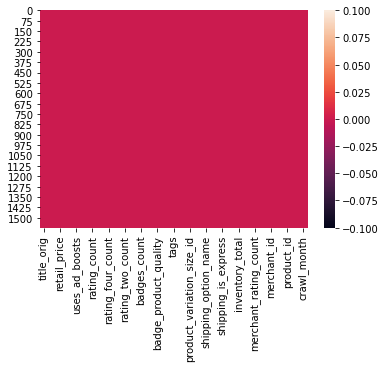

In [ ]:
sns.heatmap(sales.isnull())

In [ ]:
sales

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,CN,568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,CN,17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,CN,295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,CN,23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,CN,14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,CN,5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",lightblue,S,2,Livraison standard,1,0,26,50,CN,4435,3.696054,54d83b6b6b8a771e478558de,0,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",white,SIZE S,15,Livraison standard,2,0,11,50,CN,210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,summer,2020-08
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",white,Size S.,36,Livraison standard,3,0,29,50,CN,31,3.774194,5d56b32c40defd78043d5af9,0,5eda07ab0e295c2097c36590,summer,2020-08


In [ ]:
sales['badges_count'].value_counts()

0    1422
1     138
2      11
3       2
Name: badges_count, dtype: int64

##feature selection
lets see if the additiion of these badges make any difference in the success of the product

In [ ]:
sales['badge_local_product'].value_counts()

0    1544
1      29
Name: badge_local_product, dtype: int64

In [ ]:
sales['badge_product_quality'].value_counts()

0    1456
1     117
Name: badge_product_quality, dtype: int64

In [ ]:
sales['badge_fast_shipping'].value_counts()

0    1553
1      20
Name: badge_fast_shipping, dtype: int64

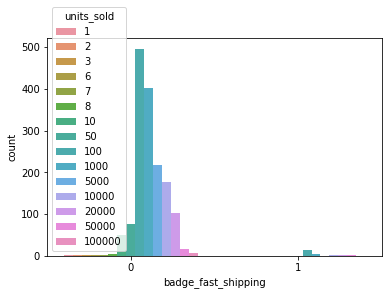

In [ ]:
sns.countplot(sales['badge_fast_shipping'],hue=sales['units_sold'])

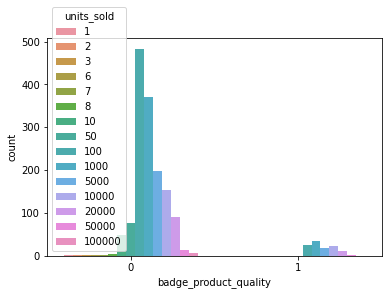

In [ ]:
sns.countplot(sales['badge_product_quality'],hue=sales['units_sold'])

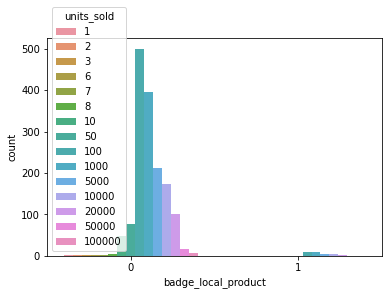

In [ ]:
sns.countplot(sales['badge_local_product'],hue=sales['units_sold'])

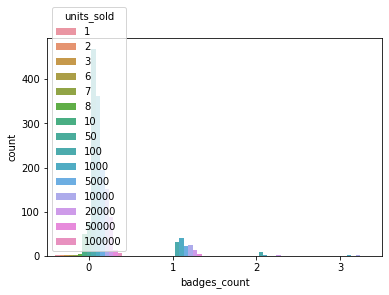

In [ ]:
sns.countplot(sales['badges_count'],hue=sales['units_sold'])

##conclusion:
the addition of badges wont affect much,
and moreover customers are not concerned about locality of the product much

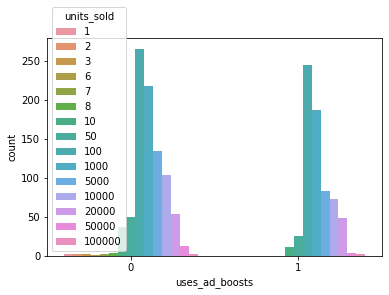

In [ ]:
sns.countplot(sales['uses_ad_boosts'],hue=sales['units_sold'])

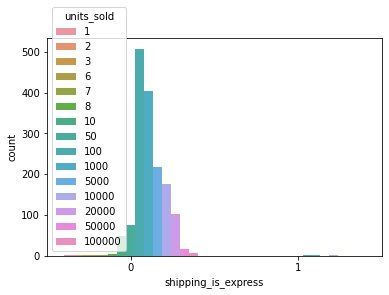

In [ ]:
sns.countplot(sales['shipping_is_express'],hue=sales['units_sold'])

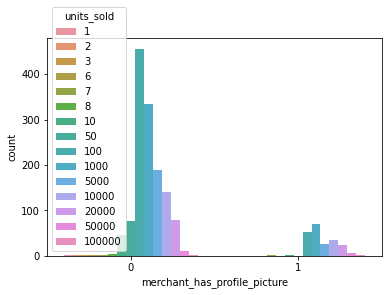

In [ ]:
sns.countplot(sales['merchant_has_profile_picture'],hue=sales['units_sold'])

In [ ]:
sales.columns

Index(['title_orig', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'origin_country',
       'merchant_rating_count', 'merchant_rating', 'merchant_id',
       'merchant_has_profile_picture', 'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [ ]:
sales.head()

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,CN,568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,CN,17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,CN,295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,CN,23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,CN,14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,summer,2020-08


In [ ]:
sales['theme'].unique()

array(['summer'], dtype=object)

In [ ]:
df = sales[['price', 'retail_price', 'units_sold', 'uses_ad_boosts','rating','rating_count','badge_product_quality','product_color','product_variation_size_id', 'product_variation_inventory','merchant_rating_count', 'merchant_rating', 'merchant_id','shipping_option_price','merchant_has_profile_picture', 'product_id']]

In [ ]:
df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badge_product_quality,product_color,product_variation_size_id,product_variation_inventory,merchant_rating_count,merchant_rating,merchant_id,shipping_option_price,merchant_has_profile_picture,product_id
0,16.00,14,100,0,3.76,54,0,white,M,50,568,4.128521,595097d6a26f6e070cb878d1,4,0,5e9ae51d43d6a96e303acdb0
1,8.00,22,20000,1,3.45,6135,0,green,XS,50,17752,3.899673,56458aa03a698c35c9050988,2,0,58940d436a0d3d5da4e95a38
2,8.00,43,100,0,3.57,14,0,leopardprint,XS,1,295,3.989831,5d464a1ffdf7bc44ee933c65,3,0,5ea10e2c617580260d55310a
3,8.00,8,5000,1,4.03,579,0,black,M,50,23832,4.020435,58cfdefdacb37b556efdff7c,2,0,5cedf17ad1d44c52c59e4aca
4,2.72,3,100,1,3.10,20,0,yellow,S,1,14482,4.001588,5ab3b592c3911a095ad5dadb,1,0,5ebf5819ebac372b070b0e70


In [ ]:
df.shape

(1573, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   units_sold                    1573 non-null   int64  
 3   uses_ad_boosts                1573 non-null   int64  
 4   rating                        1573 non-null   float64
 5   rating_count                  1573 non-null   int64  
 6   badge_product_quality         1573 non-null   int64  
 7   product_color                 1573 non-null   object 
 8   product_variation_size_id     1573 non-null   object 
 9   product_variation_inventory   1573 non-null   int64  
 10  merchant_rating_count         1573 non-null   int64  
 11  merchant_rating               1573 non-null   float64
 12  merchant_id                   1573 non-null   object 
 13  shi

In [ ]:
df['product_color'].value_counts()[:10]

black        343
white        254
yellow       105
pink          99
blue          99
red           93
green         90
grey          71
purple        53
armygreen     31
Name: product_color, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

labeling the columns of merchent_id and product_id

In [ ]:
df['merchant_id'] = le.fit_transform(df['merchant_id'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['product_id'] = le.fit_transform(df['product_id'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badge_product_quality,product_color,product_variation_size_id,product_variation_inventory,merchant_rating_count,merchant_rating,merchant_id,shipping_option_price,merchant_has_profile_picture,product_id
0,16.00,14,100,0,3.76,54,0,white,M,50,568,4.128521,533,4,0,1051
1,8.00,22,20000,1,3.45,6135,0,green,XS,50,17752,3.899673,143,2,0,62
2,8.00,43,100,0,3.57,14,0,leopardprint,XS,1,295,3.989831,808,3,0,1086
3,8.00,8,5000,1,4.03,579,0,black,M,50,23832,4.020435,465,2,0,547
4,2.72,3,100,1,3.10,20,0,yellow,S,1,14482,4.001588,640,1,0,1221


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   units_sold                    1573 non-null   int64  
 3   uses_ad_boosts                1573 non-null   int64  
 4   rating                        1573 non-null   float64
 5   rating_count                  1573 non-null   int64  
 6   badge_product_quality         1573 non-null   int64  
 7   product_color                 1573 non-null   object 
 8   product_variation_size_id     1573 non-null   object 
 9   product_variation_inventory   1573 non-null   int64  
 10  merchant_rating_count         1573 non-null   int64  
 11  merchant_rating               1573 non-null   float64
 12  merchant_id                   1573 non-null   int64  
 13  shi

here I was using one of the techniques of handling categorical features in order to get rid of curse of dimensionality

In [ ]:
def handle_cat(data,list_cat):
  for c in list_cat:
    if len(data[c].unique()) > 10:
      n = list(data[c].value_counts().index)[11:]
      data[c] = data[c].replace(n,'others')
  return data

In [ ]:
df = handle_cat(df,['product_color','product_variation_size_id'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badge_product_quality,product_color,product_variation_size_id,product_variation_inventory,merchant_rating_count,merchant_rating,merchant_id,shipping_option_price,merchant_has_profile_picture,product_id
0,16.00,14,100,0,3.76,54,0,white,M,50,568,4.128521,533,4,0,1051
1,8.00,22,20000,1,3.45,6135,0,green,XS,50,17752,3.899673,143,2,0,62
2,8.00,43,100,0,3.57,14,0,others,XS,1,295,3.989831,808,3,0,1086
3,8.00,8,5000,1,4.03,579,0,black,M,50,23832,4.020435,465,2,0,547
4,2.72,3,100,1,3.10,20,0,yellow,S,1,14482,4.001588,640,1,0,1221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,6.00,9,10000,1,4.08,1367,0,others,S,50,5316,4.224605,729,2,0,739
1569,2.00,56,100,1,3.07,28,0,others,S,2,4435,3.696054,74,1,0,1266
1570,5.00,19,100,0,3.71,59,0,white,others,15,210,3.961905,724,2,0,948
1571,13.00,11,100,0,2.50,2,0,white,others,36,31,3.774194,843,3,0,1303


In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badge_product_quality,product_variation_inventory,merchant_rating_count,merchant_rating,merchant_id,shipping_option_price,merchant_has_profile_picture,product_id,product_color_black,product_color_blue,product_color_green,product_color_grey,product_color_others,product_color_pink,product_color_purple,product_color_red,product_color_white,product_color_winered,product_color_yellow,product_variation_size_id_L,product_variation_size_id_M,product_variation_size_id_S,product_variation_size_id_S.,product_variation_size_id_XL,product_variation_size_id_XS,product_variation_size_id_XXL,product_variation_size_id_XXS,product_variation_size_id_XXXS,product_variation_size_id_others,product_variation_size_id_s
0,16.00,14,100,0,3.76,54,0,50,568,4.128521,533,4,0,1051,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,8.00,22,20000,1,3.45,6135,0,50,17752,3.899673,143,2,0,62,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,8.00,43,100,0,3.57,14,0,1,295,3.989831,808,3,0,1086,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,8.00,8,5000,1,4.03,579,0,50,23832,4.020435,465,2,0,547,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2.72,3,100,1,3.10,20,0,1,14482,4.001588,640,1,0,1221,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(1573, 36)

Labelling the data

In [ ]:
x = df.drop(['units_sold'],axis=1)
y = df['units_sold']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
m = MinMaxScaler()

In [ ]:
x = m.fit_transform(x)

In [ ]:
x

array([[0.3125    , 0.05179283, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14583333, 0.08366534, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14583333, 0.16733068, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08333333, 0.07171315, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.25      , 0.03984064, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.125     , 0.01992032, 1.        , ..., 0.        , 0.        ,
        0.        ]])

splitting the model into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_r = RandomForestRegressor(n_estimators=10,max_depth=3,n_jobs=2,random_state=2)

In [ ]:
model_r.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=2, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [ ]:
p = model_r.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
print('r2_score:'+str(r2_score(y_test,p)))

r2_score:0.7952171157582097


In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_x = XGBRegressor(n_estimators=100,max_depth=3)

In [ ]:
model_x.fit(x_train,y_train)

[09:09:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
p_g = model_x.predict(x_test)

In [ ]:
print('r2_score:'+str(r2_score(y_test,p_g)))

r2_score:0.9160145779149159


In [ ]:
print('mae:'+str(mean_absolute_error(y_test,p_g)))

mae:1368.0002844310943
